# Исследование закономерностей, определяющих успех игр

**Описание задачи проекта:** вы работаете в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Исходные данные:** 
для проекта используются данные до 2016 года. Представим, что сейчас декабрь 2016 г, и необходимо спланировать кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

<a id=5></a>
### Глава 5 Результаты исследования

* К самым перспективным консолям на 2017 год, исходя из жизненного цикла и динамики продаж по платформам за актульный период по всем регионам в целом, можно отнести PS4 и XOne. 

* По регионам NA и EU также имеет смысл обратить внимание на консоль X360, находящуюся в тройке лидеров по популярности, по жанрам сделать упор на Action, Shooter, Sports и ориентироваться на рейтинги ESRB M,E,E10+/

* По региону JP к платформам PS4 и XOne можно добавить ещё самую популярную в регионе 3DS.

* По жанрам акцент сделать на Role-Playing, Action и ориентироваться на рейтинг E, при этом допустимо и отсутствие рейтинги ESRB вовсе.

**Навыки и инструменты, применённые в работе:**

* **Библиотеки:** pandas, matplotlib.pyplot, seaborn, scipy.stats

* **Предобработка данных:**

* **Исследовательский анализ:**

* **Проверка гипотез:**

### Содержание

[Глава 1 Обзор и подготовка данных](#1)

[Глава 2 Исследовательский анализ данных](#2)

[Глава 3 Портрет пользователя каждого региона](#3)

[Глава 4 Проверка гипотез](#4)

[Глава 5 Результаты исследования](#5)

#### **Ход исследования:**

**В ходе предобработки данных были:**
* названия столбцов приведены к нижнему регистру,
* проверены исходные данные, заполнены пропуски и преобразованы типы данных,
* посчитаны суммарные продажи каждой игры по всем регионам и записаны полученные значения в отдельный столбец. 

**Проведён исследовательский анализ данных:**

* посчитано количество выпущенных игр в разные годы,
* посчитано количество миллионов копий игр, проданых на каждой из платформ,
* выделены актуальные данные для дальнейших рассчётов (за период с 2006 - 2016 г.г.),
* простроены соответсвующие расчётам графики, а также диаграмма размаха по глобальным продажам игр в разбивке по платформам,
* рассчитана зависимость продаж от отзывов  пользователей и критиков, а также зависимость продаж от жанров

**В разделе "Портрет пользователя каждого региона":**

* были выделены Тор-5 платформ по каждому региону и отражены на графике суммарные продажи по каждому региону по всем платформам, посчитаны отношения объёмов продаж в одних регионах к другим по платформам,
* выделены Тор-5 жанров по каждому региону, отражены на графике суммарные продажи по каждому региону по всем жанрам, посчитаны отношения объёмов продаж в одних регионах к другим по жанрам,
* изучено влияние рейтинга ESRB на продажи на продажи в каждом регионе.
 
**В разделе "Проверка гипотез":**

* не опровергнута гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны.
* опровергнута гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны.

<a id=1></a>
### Глава 1 Обзор и подготовка данных

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Загрузим исходные данные и посмотрим общую информацию о датасете:

In [2]:
df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов. Тип данных в столбцах — `object` и `float64`.

Согласно документации к данным:
   * Name — название игры
   * Platform — платформа
   * Year_of_Release — год выпуска
   * Genre — жанр игры
   * NA_sales — продажи в Северной Америке (миллионы проданных копий)
   * EU_sales — продажи в Европе (миллионы проданных копий)
   * JP_sales — продажи в Японии (миллионы проданных копий)
   * Other_sales — продажи в других странах (миллионы проданных копий)
   * Critic_Score — оценка критиков (максимум 100)
   * User_Score — оценка пользователей (максимум 10)
   * Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


#### Замена названий столбцов

Приведём названия столбцов к нижнему регистру:

In [4]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проверим датафрейм на наличие дубликатов:

In [5]:
df.duplicated().sum()

0

Полных дубликатов строк нет, но возможно, имеет смысл поискать дубликаты по комбинации имя-консоль-год:

In [6]:
# можно было бы сфомировать доп. датафрейм из исходного:
#search_dupl = df[['name','platform','year_of_release']]
# но делать этого не будем, т.к. это займет лишний ресурс памяти

print('Кол-во дубликтов имя-консоль-год:',df[['name','platform','year_of_release']].duplicated().sum())

Кол-во дубликтов имя-консоль-год: 2


Посмотрим, как выглядит дубликат имя-консоль-год:

In [7]:
df[['name','platform','year_of_release']].value_counts().head()

name                        platform  year_of_release
Madden NFL 13               PS3       2012.0             2
 Beyblade Burst             3DS       2016.0             1
Ratatouille                 PC        2007.0             1
Rapala Tournament Fishing!  X360      2006.0             1
Rapala Trophies             PSP       2006.0             1
dtype: int64

In [8]:
# чтобы найти найденные дубли в комбинации имя-консоль-год применим множественную фильтрацию:
(
    df[
        (df['name']=='Madden NFL 13')
        &(df['platform'] == 'PS3')
        &(df['year_of_release']==2012.0)
      ]
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Видим, что дубликат в строке № 16230 связан с тем, что, по видимому, данные по продажам были некорректно записаны. 

Чтобы избавиться от строки - дубликата перезапишем датафрейм, отфильтровав эту строку:

In [9]:
df = (
    df[
        (df['name']!='Madden NFL 13')
        &(df['platform'] != 'PS3')
        &(df['year_of_release']!=012.0)
        &(df['na_sales']!=0.00)
      ]
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11195 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11194 non-null  object 
 1   platform         11195 non-null  object 
 2   year_of_release  11000 non-null  float64
 3   genre            11194 non-null  object 
 4   na_sales         11195 non-null  float64
 5   eu_sales         11195 non-null  float64
 6   jp_sales         11195 non-null  float64
 7   other_sales      11195 non-null  float64
 8   critic_score     6719 non-null   float64
 9   user_score       8293 non-null   object 
 10  rating           8274 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.0+ MB


В результате видим, что датафрейм уменьшился на одну строку.

#### Обработка пропусков и преобразование типов

In [10]:
print('Количество пропусков в столбцах:')
print()
for col in df:
    a = len(df[df[col].isna()]) #находим кол-во пропусков в каждом слолбце
    if a!=0: #перед выводм отбрасывем столбцы, в которых нет пропусков
        print(
        '{}: {}, что составляет {:.0%} от всех данных'.format(col, len(df[df[col].isna()]), len(df[df[col].isna()])/16715)            
         )
        print()

Количество пропусков в столбцах:

name: 1, что составляет 0% от всех данных

year_of_release: 195, что составляет 1% от всех данных

genre: 1, что составляет 0% от всех данных

critic_score: 4476, что составляет 27% от всех данных

user_score: 2902, что составляет 17% от всех данных

rating: 2921, что составляет 17% от всех данных



Из 11 столбцов 6 имеют пропуски.

###### name, genre

name - название игры, пропущено всего 2 названия из 16715, что не существенно для всего объема данных. Пропущенные значения можем заменить на 'unknown', аналогичным образом дело обстоит со столбцом genre.

In [11]:
df['name'] = df['name'].fillna('unknown')
df['genre'] = df['genre'].fillna('unknown')

year_of_release - год выпуска, пропуски составляют не значительный объём от всех данных, но их необходимо заменить на 0, чтобы далее была возможность привести тип данных в столбце с вещественного на целочисленный:

##### year_of_release

In [12]:
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype('int')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


По отношению ко всему объему данных пропуски в полях name, year_of_release, genre имеют незначительный объем и могут быть связаны, с тем, что данные о названии игры, жанрах и годе выпуска были случайно не указаны или утеряны при заполнении данных.

##### critic_score

* critic_score: 8578, что составляет 51% от всех данных
* user_score: 6701, что составляет 40% от всех данных
* rating: 6766, что составляет 40% от всех данных

-пропуски имеют массовый характер, что может быть связано либо с техническими ошибками при записи в таблицу, либо с тем, что эта часть игр не вошла в рейтинги и по ним не проводились процедуры оценивания критиками и пользователями.

В связи с чем оставим пропуски critic_score и user_score без изменений.

##### user_score

Столбец user_score имеет тип object. Посмотрим, какие уникальные значения содержит столбец:

In [13]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '4.8', '8.9', '8.2', '7.8',
       '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6', '5.7', '5', '9.1',
       '6.5', 'tbd', '8.8', '9.4', '6.1', '6.7', '5.4', '4', '6.4', '7.5',
       '4.9', '9.3', '6.2', '4.2', '6', '3.7', '6.9', '6.8', '4.1', '5.6',
       '5.5', '4.4', '4.6', '5.9', '3.9', '5.8', '5.3', '3.1', '2.9',
       '5.2', '3.3', '4.7', '4.5', '5.1', '3.5', '2.5', '1.9', '3', '2.2',
       '2', '9.5', '2.1', '3.6', '2.8', '3.2', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '2.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '1.3', '0.5', '0.6', '1.4', '0.9', '1', '0.2'], dtype=object)

Значение 'tbd' - to be defined, что в случае с нашим столбцом user_score можно трактовать как "оценка пользователей ещё не определёна". 

Определим, какой % от всего количества оценок занимают занимает значение 'tbd':

In [14]:
tbd=df[df['user_score']=='tbd']
round(len(tbd)/len(df)*100,1)

19.9

Теперь посчитаем, какое количество оценок имеют значение '0':

In [15]:
nol=df[df['user_score']=='0']
len(nol)

1

Такое значение всего одно и во всём объеме данных оно, по сути, никакого влияния не оказывает. Поэтому заменим значения 'tbd' на '0', чтобы далее привести тип данных в столбце 'user_score' к типу float.Т.е. будем считать, что ещё не определённые значения оценок пользователей имеют значения 0. 

In [16]:
df['user_score'] =  df['user_score'].replace('tbd',0)

Теперь заменим тип данных в столбце user_score с object на float

In [17]:
df['user_score'] = df['user_score'].astype('float')

##### rating

Посмотрим, какие уникальные значения записаны в поле rating:

In [18]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

Значения в поле rating, являются категориальными переменными. Заменим пропущенные значения NaN на значения 'unknown'

In [19]:
df['rating'] = df['rating'].fillna('unknown')

Проверим полученный результат замены типов и пропусков:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11195 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11195 non-null  object 
 1   platform         11195 non-null  object 
 2   year_of_release  11195 non-null  int32  
 3   genre            11195 non-null  object 
 4   na_sales         11195 non-null  float64
 5   eu_sales         11195 non-null  float64
 6   jp_sales         11195 non-null  float64
 7   other_sales      11195 non-null  float64
 8   critic_score     6719 non-null   float64
 9   user_score       8293 non-null   float64
 10  rating           11195 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1005.8+ KB


##### Суммарные продажи во всех регионах 

Посчитаем суммарные продажи каждой игры по всем регионам и запишем полученные значения в отдельный столбец:

In [21]:
df['total_pay'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_pay
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


<a id=2></a>
### Глава 2 Исследовательский анализ данных 

#### Кол-во выпущенных игр в разные годы

In [22]:
games_year = df.pivot_table(index='year_of_release', values = 'name', aggfunc = 'count').reset_index()
games_year.columns = ['year_of_release','amount_of_games']
games_year.head()

,year_of_release,amount_of_games
0,0,195
1,1980,9
2,1981,46
3,1982,36
4,1983,17


Отфильтруем нулевые значения года выпуска: 

In [23]:
games_year = games_year[games_year['year_of_release']!=0]
games_year.head()

,year_of_release,amount_of_games
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,10


По рассчитанным данным построим соответсвующий график:

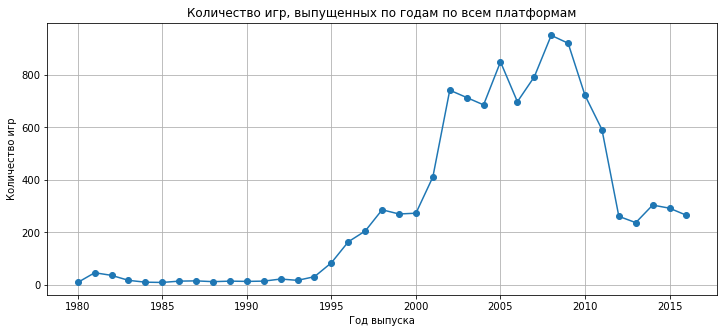

In [24]:
games_year.plot(title='Количество игр, выпущенных по годам по всем платформам', x='year_of_release', y='amount_of_games', legend=None, style='o-', grid=True, figsize=(12,5))
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
plt.show()

Выделим из исходной таблицы столбцы с названием игр и годом выпуска и удалим повторы названий игр, т.е. одни и те же игры, которые вышли на разных платформах 

In [25]:
df[['name','year_of_release']].duplicated().sum()

2868

In [26]:
uniq_games_year = df[['name','year_of_release']].drop_duplicates()

Сгруппируем в сводной таблице и посчитаем количество выпусков игр по годам:

In [27]:
uniq_games_year = uniq_games_year.pivot_table(index='year_of_release', values = 'name', aggfunc = 'count').reset_index()
uniq_games_year.columns = ['year_of_release','amount_of_games']
uniq_games_year = uniq_games_year[uniq_games_year['year_of_release']!=0]

На основе полученных данных об уникальных выпусках игр построим график:

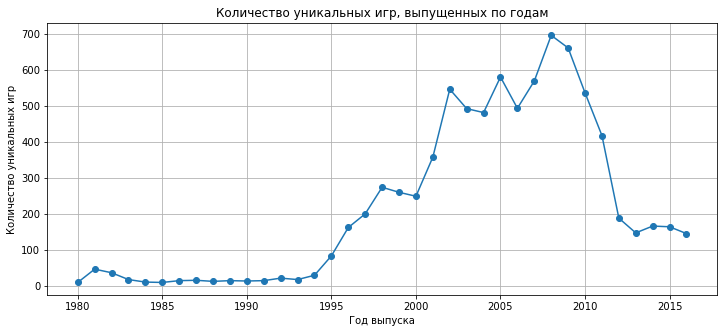

In [77]:
uniq_games_year.plot(title='Количество уникальных игр, выпущенных по годам', x='year_of_release', y='amount_of_games', legend=None, style='o-', grid=True, figsize=(12,5))
plt.xlabel("Год выпуска")
plt.ylabel("Количество уникальных игр")
plt.show()

**Вывод:** под данным таблицы games_year и графика видим, что до 1995 года количество выпускаемых игр было меньше 100 в год.

#### Изменение продаж по платформам.

Посчитаем, какое количество миллионов копий игр было продано на каждой из платформ:

In [29]:
df = df[df['year_of_release']!=0]
platform_sales= (
    df.groupby('platform')['total_pay'].sum()
    .sort_values(ascending=False)
                )
platform_sales

platform
PS2     1159.23
X360     954.58
Wii      869.79
DS       734.82
PS       665.31
PS4      307.48
GBA      298.27
XB       251.48
PSP      237.82
NES      228.23
GB       225.91
3DS      218.23
PC       212.29
N64      211.24
GC       193.92
XOne     159.00
SNES     128.13
2600      86.48
WiiU      80.57
PSV       37.70
GEN       29.17
DC         8.82
SAT        4.17
SCD        1.50
Name: total_pay, dtype: float64

Построим график динамики продаж по годам для пяти платформ наибольшими суммарными продажами:

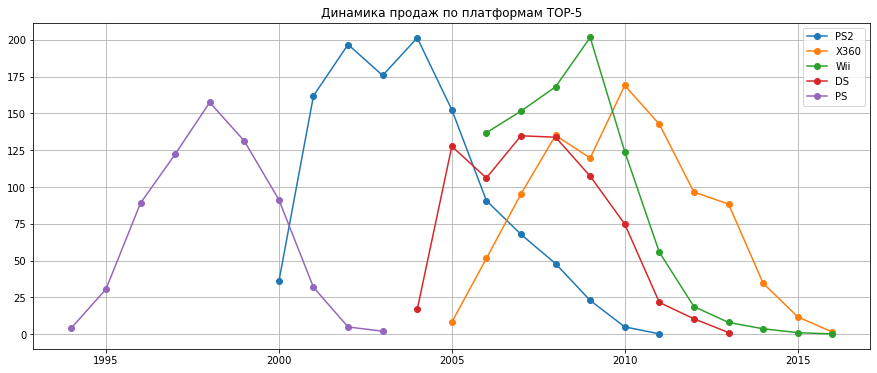

In [30]:
platform_sales = (
                  df.pivot_table(index=['platform','year_of_release'], values='total_pay' , aggfunc='sum')
                  .unstack('platform').reset_index()
                  )
 

plt.figure(figsize=(15,6))
Years = platform_sales['year_of_release']

consol = ['PS2','X360','Wii','DS','PS']

for x in consol:
    y= platform_sales['total_pay'][x]
    plt.plot(Years, y, '-o',label= x)
    
plt.grid()
plt.legend()
plt.title("Динамика продаж по платформам TOP-5")
plt.show()

**Вывод:** из графиков видим, что характерный срок жизни платформы 9-11 лет.

#### Актуальные данные для исследования

Т.к. характерный срок жизни платформы 9-11 лет и на последние 10 лет приходится период использования 4-х из 6 самых популярных платформ, то для дальнейшего исследования возьмём данные за период с 2006 - 2016 г.г. 

In [31]:
df=df[df['year_of_release']> 2011]
df.head(10).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_pay
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [32]:
df['platform'].unique() #смотрим уникальные значения названий платформ за выбранный период

array(['X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'PSP'], dtype=object)

In [33]:
platform_sales = df.pivot_table(index=['platform','year_of_release'], values='total_pay' , aggfunc='sum').sort_values(by=['platform','year_of_release'], ascending=True)
platform_sales.reset_index().head()

,platform,year_of_release,total_pay
0,3DS,2012,44.95
1,3DS,2013,45.26
2,3DS,2014,36.55
3,3DS,2015,19.85
4,3DS,2016,10.73


По рассчитанным данным построим график инамика продаж по платформам 2012-2016:

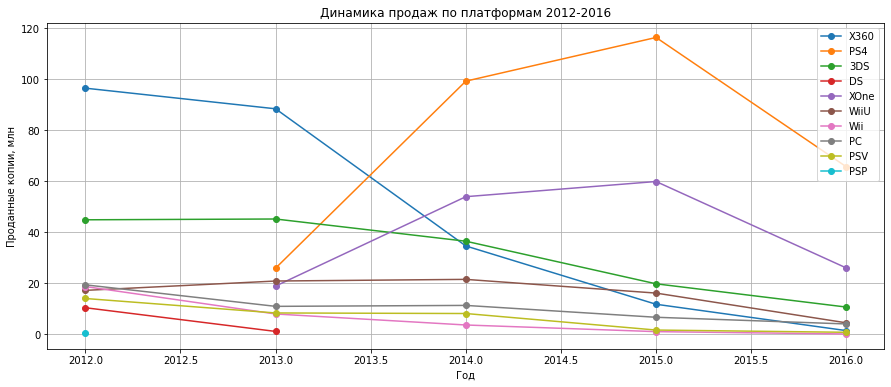

In [34]:
platform_sales = (df.pivot_table(index=['platform','year_of_release'], values='total_pay' , aggfunc='sum')
                  .unstack('platform').reset_index()
                  )

plt.figure(figsize=(15,6))
Years =  platform_sales['year_of_release']

consol = df['platform'].unique()

for x in consol:
    y = platform_sales['total_pay'][x]
    plt.plot(Years, y, '-o', label= x)

plt.grid()
plt.legend()
plt.title("Динамика продаж по платформам 2012-2016")
plt.xlabel('Год')
plt.ylabel('Проданные копии, млн')
plt.show()

**Вывод:** из графиков видим, что за 2015 год наблюдается спад продаж по всем платформам. При этом лидирами по продажам являются платформы: PS4, XOne, 3DS.

Платформы PS4, XOne можно считать самыми перспективными, т.к. из жизненного цикла платформы в 9-11 лет эти платформы прошли только по 3 года и с конца 2013 года начали лидировать по продажам и продолжили рост в 2014 году, тогда как по другим наблюдался спад и в 2015 при общем спаде на рынке, остались лидерами с большим отрывом.

#### Диаграмма размаха

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

(0.0, 6.0)

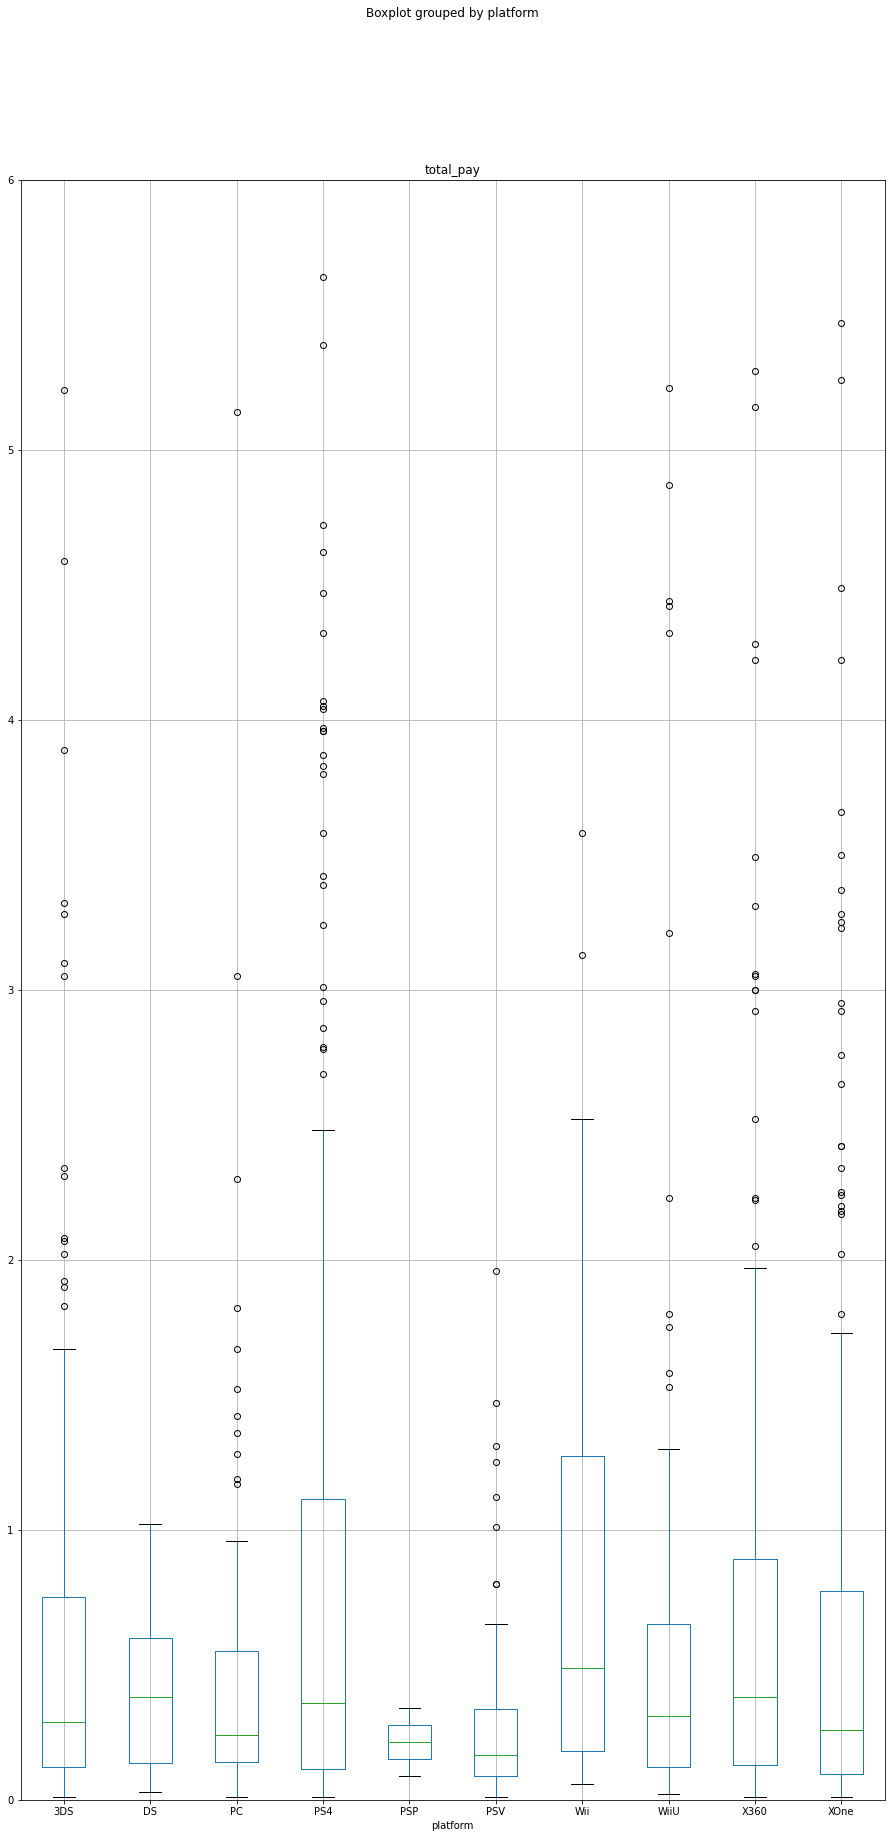

In [78]:
df.boxplot(column='total_pay', by='platform', figsize=(15,30))

plt.ylim([0, 6]) # масштабирование графика с помощью ограничения оси параметром ylim

**Вывод:** по диаграмме размаха видим, нормальное распределение находится примерно в пределах 0,5-2 млн. копий по платформам, при этом значительное количество продаж выходит за пределы нормального распределения (за размах усов) и находится в приделах 0,5-5 мнл. копий по различным платформам.

Над "усами" графиков, в пределах которых расположены нормальные значения, находится значительно количество точек, обозначающих выбросы, т.е. значения 'total_pay' (суммарные продажи), которые выделяются из общей выборки. Для наших данных выбросы дают игры, лидирующие по продажам по каждой из платформ.

То есть можем сказать, что выбросы это какие-то популярные игры.Посмотрим, например на 3DS. Маленький ящик и много выбросов. Это говорит о том, что большАя часть объема продаж делается за счет этих выбросов. В то же время у XOne ситуация другая: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на XOne покупают самые разные игры, причем, в немалом количестве. 

#### Зависимость продаж от отзывов

Отфильтруем нули в оценках, ведь они влияют на коэфф-т.

In [38]:
len(df[df['critic_score']==0])

0

In [39]:
len(df[df['user_score']==0])

59

In [40]:
df_1=df[df['user_score']!=0].reset_index()

Рассмотрим, как влияют на продажи отзывы пользователей и критиков на примере платформы PS4. 

In [41]:
PS4 = df[df['platform']=='PS4']

Построим диаграммs рассеяния для зависимости продаж на платформе PS4 от оценки критиков и пользователей :

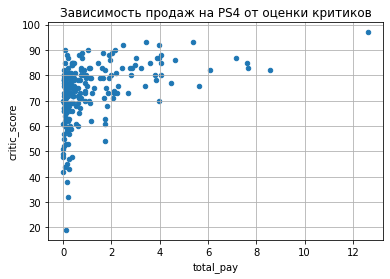

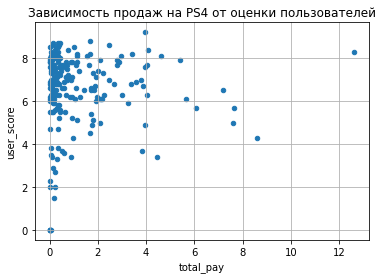

In [79]:
PS4.plot(title = 'Зависимость продаж на PS4 от оценки критиков', x='total_pay', y = 'critic_score', kind = 'scatter', grid = True)
PS4.plot(title = 'Зависимость продаж на PS4 от оценки пользователей', x='total_pay', y = 'user_score', kind = 'scatter', grid = True)
plt.show()

In [43]:
print('Коэффициент корреляции продаж от оценок критиков для платформы PS4:', PS4['total_pay'].corr(PS4['critic_score'])) 
print('Коэффициент корреляции продаж от оценок пользователей для платформы PS4:',PS4['total_pay'].corr(PS4['user_score'])) 

Коэффициент корреляции продаж от оценок критиков для платформы PS4: 0.4117238309202437
Коэффициент корреляции продаж от оценок пользователей для платформы PS4: 0.033886990695734455


Коэффициент корреляции продаж от оценок пользователей для платформы PS4:

In [44]:
print('Коэффициент корреляции продаж от оценок пользователей для платформы PS4:',PS4['total_pay'].corr(PS4['user_score'])) 

Коэффициент корреляции продаж от оценок пользователей для платформы PS4: 0.033886990695734455


По графикам и результатам рассчётов коэффециентов корреляции видим, что отзывы критиков имеют прямое влияние на продажи по платформе PS4. Влияние оценки пользователей по имеющимся данным практически отсутсвтует. 

Посмотрим, как обстоят дела с остальными платформами, лидирующими по продажам за последние 3 года: XOne, 3DS

In [45]:
XOne = df[df['platform']=='XOne']

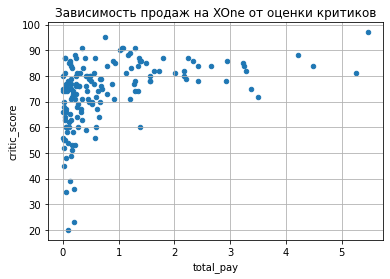

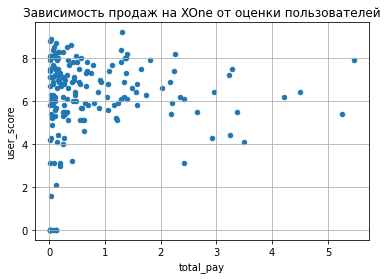

In [80]:
XOne.plot(title = 'Зависимость продаж на XOne от оценки критиков', x='total_pay', y = 'critic_score', kind = 'scatter', grid = True)
XOne.plot(title = 'Зависимость продаж на XOne от оценки пользователей', x='total_pay', y = 'user_score', kind = 'scatter', grid = True)
plt.show()

In [47]:
print('Коэффициент корреляции продаж от оценок критиков для платформы XOne:', XOne['total_pay'].corr(XOne['critic_score'])) 
print('Коэффициент корреляции продаж от оценок пользователей для платформы XOne:',XOne['total_pay'].corr(XOne['user_score'])) 

Коэффициент корреляции продаж от оценок критиков для платформы XOne: 0.4112189411751006
Коэффициент корреляции продаж от оценок пользователей для платформы XOne: 0.0942573780554114


Для платформы XOne значения влияния оценок критиков и пользователей чуть меньше чем у PS4, но в целом ситуация схожая.

In [48]:
 Tr_DS = df[df['platform']=='3DS']

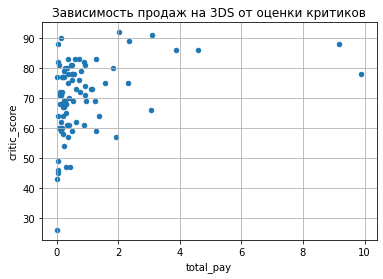

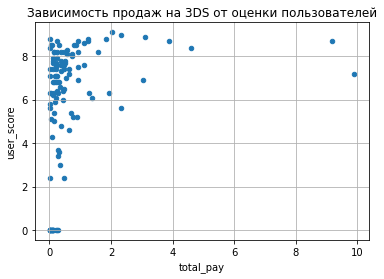

In [81]:
Tr_DS.plot(title = 'Зависимость продаж на 3DS от оценки критиков', x='total_pay', y = 'critic_score', kind = 'scatter', grid = True)
Tr_DS.plot(title = 'Зависимость продаж на 3DS от оценки пользователей', x='total_pay', y = 'user_score', kind = 'scatter', grid = True)
plt.show()

In [50]:
print('Коэффициент корреляции продаж от оценок критиков для платформы 3DS:', Tr_DS['total_pay'].corr(Tr_DS['critic_score'])) 
print('Коэффициент корреляции продаж от оценок пользователей для платформы 3DS:', Tr_DS['total_pay'].corr(Tr_DS['user_score'])) 

Коэффициент корреляции продаж от оценок критиков для платформы 3DS: 0.3209370625183588
Коэффициент корреляции продаж от оценок пользователей для платформы 3DS: 0.2572112605725825


Для платформы 3DS влияние оценок критиков также чуть меньше, чем у PS4, а вот оценки пользователей никакого влияния не оказывают.

**Вывод:** по графикам и результатам рассчётов коэффециентов корреляции видим, что для платформ Тор-3 по продажам (за актуальный период) есть небольшая зависимость продаж от оценок критиков, при этом она не является определяющей. Влияние оценок пользователей отсутсвует.

#### Зависимость продаж от жанров

Посчитаем количество игр по каждому жанру, для этого выделим из таблицы df столбцы 'name', 'genre' и удалим дубликаты, чтобы избавиться от повторов, когда одно и то же сочетание игра повторяется на нескольких платформах: 

In [83]:
uique_genres_game = df[['name', 'genre']].drop_duplicates()
print('Кол-во уникальных игр по всем жанрам:', len(uique_genres_game))

Кол-во уникальных игр по всем жанрам: 772


In [52]:
genres_game =uique_genres_game.groupby('genre')['name'].count().sort_values(ascending=False).reset_index()
genres_game.columns=['genre','amount']
genres_game 

,genre,amount
0,Action,247
1,Role-Playing,120
2,Shooter,83
3,Sports,66
4,Misc,54
5,Fighting,40
6,Racing,39
7,Adventure,38
8,Platform,37
9,Simulation,23


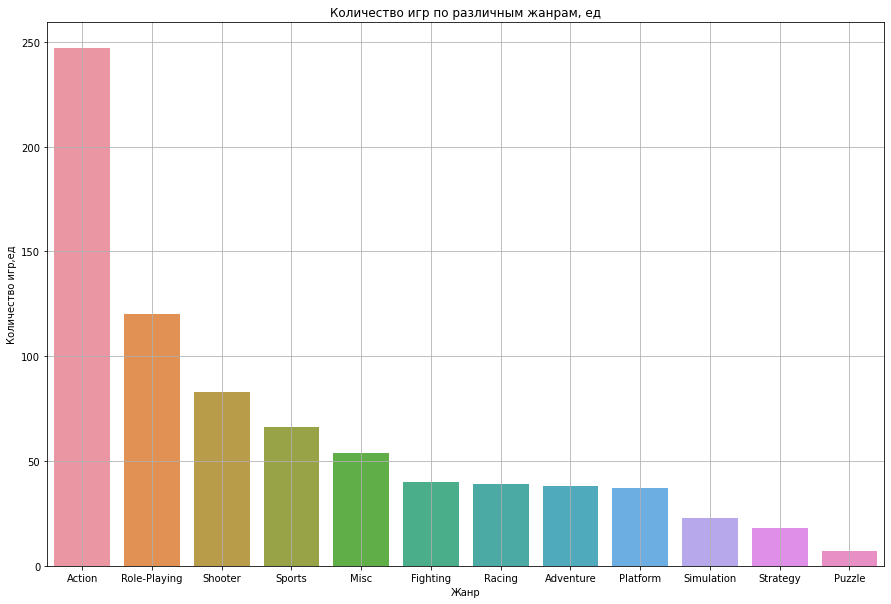

In [53]:
plt.figure(figsize=(15,10))

sns.barplot(x='genre', y='amount', data=genres_game) 

plt.grid()
plt.title('Количество игр по различным жанрам, ед')
plt.xlabel('Жанр')
plt.ylabel('Количество игр,ед')
plt.show()

Видим, что в Top-5 жанров по количеству игр входят: Action, Sports, Misc, Shooter, Role-Playing.
С не вошел в Тор-5 жанр Racing, при этом по количеству игр он имеет минимальное отставание от жанра Role-Playing.

Теперь посчитаем суммарные продажи млн. копий по каждому жанру:

In [54]:
genres_sale=df.groupby('genre')['total_pay'].sum().sort_values(ascending=False).reset_index()
genres_sale.columns=['genre','total_pay']
genres_sale

,genre,total_pay
0,Action,298.26
1,Shooter,243.23
2,Role-Playing,145.38
3,Sports,124.86
4,Misc,69.37
5,Platform,56.28
6,Racing,40.54
7,Fighting,31.84
8,Simulation,29.32
9,Adventure,15.97


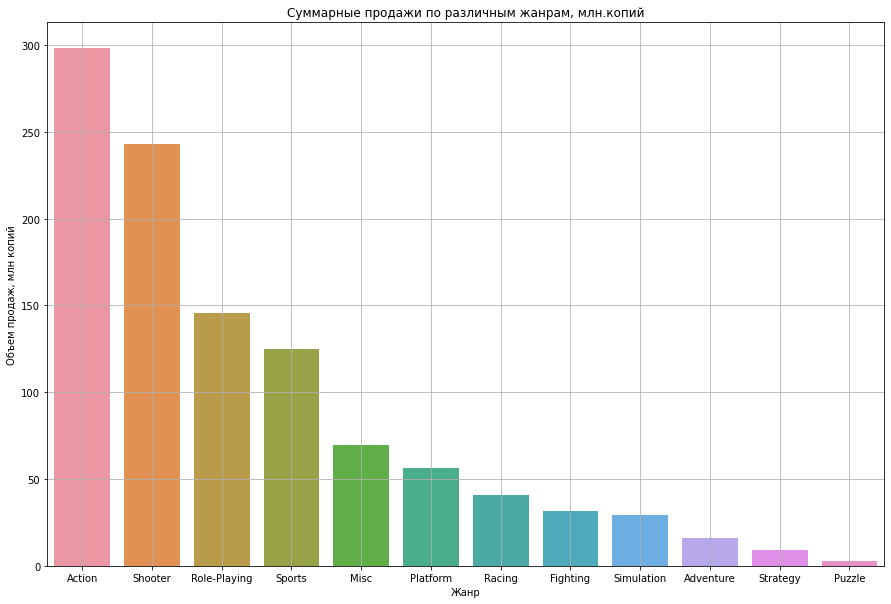

In [55]:
plt.figure(figsize=(15,10))

sns.barplot(x='genre', y='total_pay', data=genres_sale) 

plt.grid()
plt.title('Суммарные продажи по различным жанрам, млн.копий')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж, млн копий')
plt.show()

Видим, что к Top-5 самых **продаваемых** жанров относятся: Action, Sports, Shooter, Platform, Role-Playing. 
Таким образом, вошедщий в Top-5 по количеству игр жанр Misc - не вошёл в Top-5 самых продаваемых жанров и оказался на 6-ом месте по продажам. Что означает, что большое количество игр в жанре не всегда определяет успешность по объемам продаж. Но в целом, зависимость между количеством игр в жанре и объёмом продаж практически прямая, что подтверждает коэффициент корреляции:

In [56]:
print(genres_game['amount'].corr(genres_sale['total_pay'])) 

0.941469294006578


В Top-5 жанров с самыми низкими продажами входят: Simulation, Fighting, Adventure, Puzzle, Strategy.

In [57]:
df=df[df['genre'] !='unknown'] 
median_genres_sale=df.groupby('genre')['total_pay'].median().sort_values(ascending=False).reset_index()
median_genres_sale.columns=['genre','median_total_pay']
median_genres_sale

,genre,median_total_pay
0,Shooter,0.570
1,Sports,0.480
2,Role-Playing,0.340
3,Misc,0.315
4,Racing,0.270
5,Action,0.255
6,Platform,0.255
7,Strategy,0.240
8,Simulation,0.205
9,Fighting,0.195


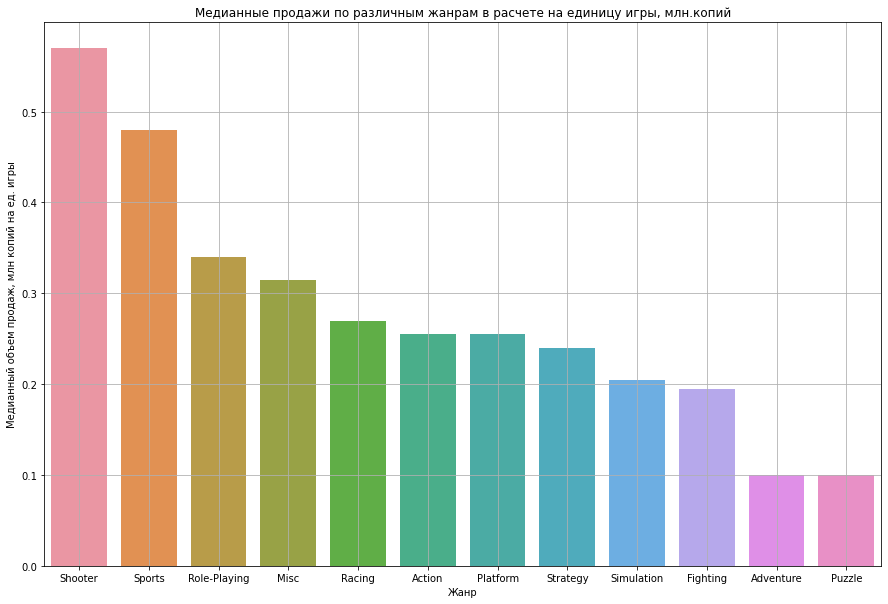

In [58]:
plt.figure(figsize=(15,10))

sns.barplot(x='genre', y='median_total_pay', data=median_genres_sale) 

plt.grid()
plt.title('Медианные продажи по различным жанрам в расчете на единицу игры, млн.копий')
plt.xlabel('Жанр')
plt.ylabel('Медианный объем продаж, млн копий на ед. игры')
plt.show()

**Вывод:** при рассчёте продаж на еденицу игры из пятёрки лидеров выбыл жанр Action, который был первым по абсолютным показателям продаж, но зато пятёрку лидеров по продажам при рассчёте на единицу игры добавился жанр Platform.И внутри пятёрки жанры поменялись местами.

Теперь экшн не такой популярный. Это нам говорит о том, что у этого жанра очень много игр, которые мало покупают. А вот у шутера гораздо больше игр покупают в большом количестве.

<a id=3></a> 
### Глава 3 Портрет пользователя каждого региона

#### Топ-5 популярных платформ 

Посмотрим, какие платформы входоят в Тор-5 по продажам по каждому региону:

In [59]:
na_sales = df.pivot_table(index=['platform',], values=['na_sales'] , aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index()              
eu_sales = df.pivot_table(index=['platform',], values=['eu_sales'] , aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index()              
jp_sales = df.pivot_table(index=['platform',], values=['jp_sales'] , aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index()              


display(na_sales.head())
display(eu_sales.head())
display(jp_sales.head())

,platform,na_sales
0,X360,137.52
1,PS4,108.74
2,XOne,93.12
3,3DS,55.31
4,WiiU,37.89


,platform,eu_sales
0,PS4,138.66
1,X360,73.87
2,XOne,51.28
3,3DS,40.81
4,PC,28.60


,platform,jp_sales
0,3DS,52.42
1,PS4,12.13
2,WiiU,11.88
3,PSV,6.98
4,DS,3.51


Видим, что состав платформ и их позиции в Тор-5 отличаются. Посчитаем в процентном соотношении, насколько отличаются продажи по регионам по каждой платформе:

na/eu - отношение продаж в регионе na к продажам в регионе eu;

na/jp - отношение продаж в регионе na к продажам в регионе jp;

eu/jp - отношение продаж в регионе eu к продажам в регионе jp.

In [60]:
sales_region= na_sales.merge(eu_sales, on='platform', how='left',suffixes=('na_sales', 'eu_sales')) 
sales_region=sales_region.merge(jp_sales, on='platform', how='left',suffixes=('na_sales', 'eu_sales', 'jp_sales'))
sales_region['na/eu'] = round(sales_region['na_sales']/sales_region['eu_sales'],1)
sales_region['na/jp'] = round(sales_region['na_sales']/sales_region['jp_sales'],1)
sales_region['eu/jp'] = round(sales_region['eu_sales']/sales_region['jp_sales'],1)
sales_region

,platform,na_sales,eu_sales,jp_sales,na/eu,na/jp,eu/jp
0,X360,137.52,73.87,1.45,1.9,94.8,50.9
1,PS4,108.74,138.66,12.13,0.8,9.0,11.4
2,XOne,93.12,51.28,0.33,1.8,282.2,155.4
3,3DS,55.31,40.81,52.42,1.4,1.1,0.8
4,WiiU,37.89,24.87,11.88,1.5,3.2,2.1
5,PC,19.12,28.60,0.00,0.7,inf,inf
6,Wii,16.98,11.17,1.09,1.5,15.6,10.2
7,PSV,10.70,10.17,6.98,1.1,1.5,1.5
8,DS,4.59,2.88,3.51,1.6,1.3,0.8
9,PSP,0.13,0.18,0.02,0.7,6.5,9.0


Отразим данные по продажам по платформам по каждому региону на графике:

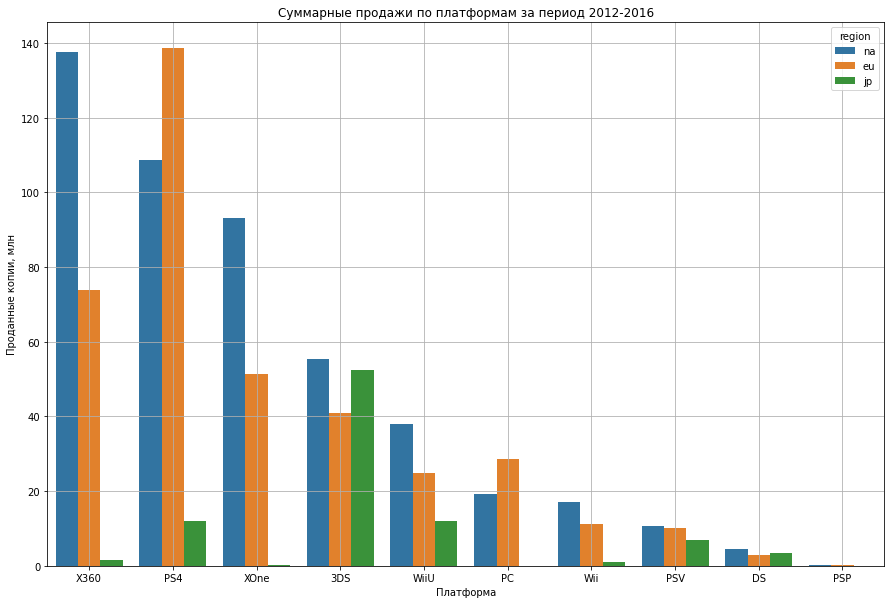

In [61]:
platform =sales_region['platform']
na = sales_region[['platform','na_sales']].rename(columns={'na_sales':'sales'})
na['region'] = 'na'
eu = sales_region[['platform','eu_sales']].rename(columns={'eu_sales':'sales'})
eu['region'] = 'eu'
jp = sales_region[['platform','jp_sales']].rename(columns={'jp_sales':'sales'})
jp ['region'] = 'jp'

plt.figure(figsize=(15,10))

concat=pd.concat([na,eu,jp])
sns.barplot(x='platform', y='sales', hue='region', data=concat)

plt.grid()
plt.title('Суммарные продажи по платформам за период 2012-2016')
plt.xlabel('Платформа')
plt.ylabel('Проданные копии, млн')
plt.show()

По графику видим разницу в предпочтениях пользователей регионов NA, EU и JP. 

NA - лидирует по продажам относительно других регинов, особенно по Тор-5 платформ в NA. В регионе EU предпочтения по платформам Тор-5 схожие с небольшой разницей в порядке лидирующих платформ, но в общем, объемы продаж зачастую, примерно в 1,5 - 2 раза ниже. Исключение составляют платформы PS4, PC, которые превышают объем продаж региона NA и платформа PSV,которая имеет аналогичные, невысокие продажи как и в регионе NA.

Регион JP отличается по своим предпочтениям от регионов NA, EU. Например, лидирующая в NA, EU платформа X360, в JP имеет незначительный объем продаж. Лидируют в JP платформы DS (4-е место в NA, EU), PS (5-е место в NA 4-е в EU), PS2(2-е местов NA 1-е в EU), платформы NES и 3DS так же вошедшие в Тор-5 в в JP, не вошли в Тор-5 регионов NA, EU. И в целом, объемы продаж по платформам значительно ниже, чем в NA, EU.
	



#### Топ-5 популярных жанров 

Посмотрим, какие жанры входоят в Тор-5 по каждому региону:

In [62]:
na_genre = df.pivot_table(index=['genre'], values=['na_sales'] , aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index()              
eu_genre = df.pivot_table(index=['genre'], values=['eu_sales'] , aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index()              
jp_genre = df.pivot_table(index=['genre'], values=['jp_sales'] , aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index()              

display(na_genre.head())
display(eu_genre.head())
display(jp_genre.head())

,genre,na_sales
0,Action,137.86
1,Shooter,122.46
2,Sports,59.38
3,Role-Playing,56.33
4,Misc,34.68


,genre,eu_sales
0,Action,111.77
1,Shooter,87.93
2,Sports,48.22
3,Role-Playing,41.87
4,Misc,22.56


,genre,jp_sales
0,Role-Playing,35.09
1,Action,16.10
2,Platform,8.48
3,Simulation,8.43
4,Misc,5.84


Видим, что самые популярные жанры и их позиции в Тор-5 отличаются по разным регионам. По регионам NA и EU первая тройка популярных жанров одинаковая (Action, Sports, Shooter), отличие только по объемам продаж (в NA они примерно в 1,5 -2 раза выше) и отличаются четвертые и пятая позиции. (NA: Platform и Misc, в EU-Racing и Platform).

По региону JP - состав самых популярных жанров схож, но в отличие от NA - жанр Role-Playing - занимет первое место и замыкает Тор-5 жанр Platform. Жанр Shooter не вошёл регионе JP в Тор-5, в отличии от NA и EU.

Посчитаем в процентном соотношении, насколько отличаются продажи по регионам по каждому жанру:

In [63]:
genre_region= na_genre.merge(eu_genre, on='genre', how='left', suffixes=('na_sales','eu_sales')) 
genre_region=genre_region.merge(jp_genre, on='genre', how='left', suffixes=('na_sales', 'eu_sales', 'jp_sales'))

genre_region['na/eu'] = round(genre_region['na_sales']/genre_region['eu_sales'],1)
genre_region['na/jp'] = round(genre_region['na_sales']/genre_region['jp_sales'],1)
genre_region['eu/jp'] = round(genre_region['eu_sales']/sales_region['jp_sales'],1)

genre_region

,genre,na_sales,eu_sales,jp_sales,na/eu,na/jp,eu/jp
0,Action,137.86,111.77,16.10,1.2,8.6,77.1
1,Shooter,122.46,87.93,5.12,1.4,23.9,7.2
2,Sports,59.38,48.22,2.25,1.2,26.4,146.1
3,Role-Playing,56.33,41.87,35.09,1.3,1.6,0.8
4,Misc,34.68,22.56,5.84,1.5,5.9,1.9
5,Platform,23.48,19.42,8.48,1.2,2.8,inf
6,Fighting,16.09,7.80,4.74,2.1,3.4,7.2
7,Racing,14.64,19.87,1.65,0.7,8.9,2.8
8,Simulation,7.46,11.67,8.43,0.6,0.9,3.3
9,Adventure,6.70,6.40,0.98,1.0,6.8,320.0


Отразим данные по продажам по жанрам по каждому региону на графике:

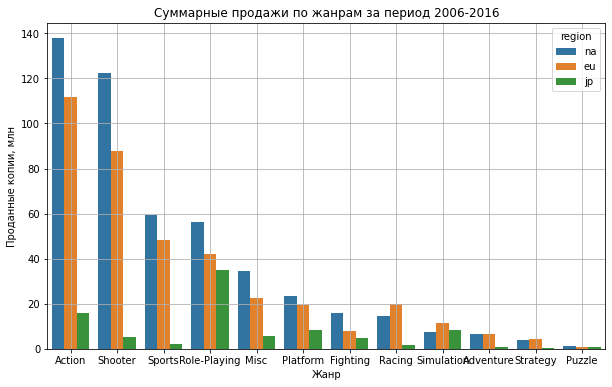

In [64]:
genre =genre_region['genre']
na = genre_region[['genre','na_sales']].rename(columns={'na_sales':'sales'})
na['region'] = 'na'
eu = genre_region[['genre','eu_sales']].rename(columns={'eu_sales':'sales'})
eu['region'] = 'eu'
jp = genre_region[['genre','jp_sales']].rename(columns={'jp_sales':'sales'})
jp ['region'] = 'jp'

plt.figure(figsize=(10,6))

concat=pd.concat([na,eu,jp])
sns.barplot(x='genre', y='sales', hue='region', data=concat)

plt.grid()
plt.title('Суммарные продажи по жанрам за период 2006-2016')
plt.xlabel('Жанр')
plt.ylabel('Проданные копии, млн')
plt.show()

####  Влияние рейтинга ESRB на продажи

In [65]:
rating_region = (
            df.pivot_table(index=df['rating'], values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
            .sort_values(by='na_sales', ascending=False)
            .reset_index() 
            )
rating_region

,rating,eu_sales,jp_sales,na_sales
0,M,139.73,9.32,180.93
1,unknown,73.50,37.43,91.16
2,E,82.37,24.80,90.03
3,E10+,45.46,7.07,67.93
4,T,41.43,11.19,54.05


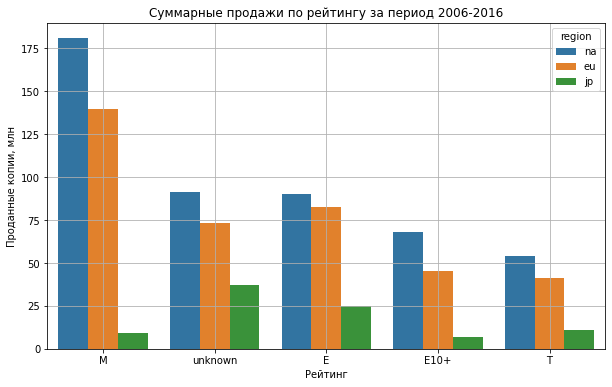

In [66]:
rating =rating_region['rating']
na = rating_region[['rating','na_sales']].rename(columns={'na_sales':'sales'})
na['region'] = 'na'
eu = rating_region[['rating','eu_sales']].rename(columns={'eu_sales':'sales'})
eu['region'] = 'eu'
jp = rating_region[['rating','jp_sales']].rename(columns={'jp_sales':'sales'})
jp ['region'] = 'jp'

plt.figure(figsize=(10,6))

concat=pd.concat([na,eu,jp])
sns.barplot(x='rating', y='sales', hue='region', data=concat)

plt.grid()
plt.title('Суммарные продажи по рейтингу за период 2006-2016')
plt.xlabel('Рейтинг')
plt.ylabel('Проданные копии, млн')
plt.show()

По графику видим, что рейтинг влияет на продажи игр, причём тенденции влияния практически одинаковые с небольшим отличием по JP региону.

По регионам NA и EU продажи идут по убывающей в зависимости от рейтинга: 

* E- 1-ое место по объемам продаж
* M - 2-ое место	
* T - 3-е место
* E10+ - 4-ое место.

По региону JP:
* E- также на 1-ом месте по объемам продаж,
* T - на 2-ом месте в отличии от регионов NA и EU
* М - 3-е место в отличии от регионов NA и EU
* E10+ - также 4-ое место


Почему в Японии чаще покупают игры без рейтинга? Это может быть связано с  тем, что часть игр созданная в Японии, может не попадать под рейтинги ESRB.
Возможно, дело тут в том, что ESRB работает только на территории СА, в Японии есть аналогичная организация: CERO. С одной стороны, иностранным играм они (ESRB) не присваивают рейтинги, поскольку на них уже есть маркировка. Чтобы не было конфликта, так сказать. Так что вполне возможно, что часть игр это продукция Японии или же это корейские игры (там тоже своя организация). С другой стороны, раз они продают игры на своем рынке, то присвоение рейтинга может быть обязательным. Значит, дело еще может быть в том, что наша таблица это склейка двух таблиц: продажи на Западе и на Востоке. Так или иначе, это очень показательный пример. И именно разница в рынках (восточный и западный) наталкивает на мысль о неслучайности пропусков.


<a id=4></a>
### Глава 4 Проверка гипотез

#### Гипотеза 1

Проверим гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые."

Сформулируем нулевую гипотезу H₀: 
"Средние пользовательские рейтинги платформ Xbox One и PC равны."

Альтернативная гипотеза H₁: "Средние пользовательские рейтинги платформ Xbox One и PC различаются." - двухсторонняя гипотеза, т.к. отличия могут быть как в одну так и другую сторону.

In [67]:
df_XOne = (
           df[
                (df['platform']=='XOne') # фильтруем интересующую платформу
                #& (df['year_of_release']> 2011) #фильтруем период
                & (df['user_score'] != 0) # отфильтровываем нули из оценок
            ]
          )
             
df_PC = (
           df[
                (df['platform']=='PC')
                #& (df['year_of_release']> 2011)
                & (df['user_score'] != 0)
            ]
          )

In [68]:
len(df_XOne)

216

In [69]:
len(df_PC)

113

При проверке гипотезы будем использовать доп.параметр  equal_var = False, т.к. выборки по тарифам не большие и при этом значительно отличаются друг от друга.

In [70]:
XOne_user_score= df_XOne['user_score'].dropna()
PC_user_score= df_PC['user_score'].dropna()

In [71]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем нулевую гипотезу

results = st.ttest_ind(
    XOne_user_score, 
    PC_user_score, equal_var = False) 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.49296686919074384
Не получилось отвергнуть нулевую гипотезу


Результат теста **не отвергает** нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC равны.

#### Гипотеза 2

Проверим гипотезу: "Средние пользовательские рейтинги жанров Action и Sports разные."

Сформулируем нулевую гипотезу H₀: 
"Средние пользовательские рейтинги жанров Action и Sports **равны**."

Альтернативная гипотеза H₁: "Средние пользовательские рейтинги жанров Action и Sports **разные**." - двухсторонняя гипотеза, т.к. отличия могут быть как в одну так и другую сторону.

In [72]:
df_Action = (
           df[
                (df['genre']=='Action') # фильтруем интересующий жанр
                #& (df['year_of_release']> 2011) #фильтруем период
                & (df['user_score'] != 0) # отфильтровываем нули из оценок пользователей
            ]
          )
             
df_Sports = (
           df[
                (df['genre']=='Sports')
                #& (df['year_of_release']> 2011)
                & (df['user_score'] != 0)
            ]
          )

In [73]:
len(df_Action)

470

In [74]:
len(df_Sports)

130

При проверке гипотезы будем использовать доп.параметр  equal_var = False, т.к. выборки по тарифам не большие и при этом значительно отличаются друг от друга.

In [75]:
Action_user_score= df_Action['user_score'].dropna()
Sports_user_score= df_Sports['user_score'].dropna()

In [76]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем нулевую гипотезу

results = st.ttest_ind(
    Action_user_score, 
    Sports_user_score, equal_var = False) 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
    
#import warnings   
#warnings.simplefilter('ignore')

p-значение: 4.1166271763267964e-11
Отвергаем нулевую гипотезу


Результат теста **отвергает** нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны и оставлет нам альтернативную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.